# Trabajo Práctico 7 - Grupo 2
## Matías Bergerman, Pablo González Leiro, Tobias Demeco, Matías Tripoli

In [6]:
# Import libraries
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

In [7]:
def display_np(x, scale = 1.0, resampling = Image.Resampling.BICUBIC):
    im = Image.fromarray(x.clip(0, 255).astype(np.uint8))
    display(im.resize((np.array(im.size)*scale).astype(int), resampling))

def display_np_row(x, scale = 1.0, resampling = Image.Resampling.BICUBIC, spacer_width = 0, spacer_grayscale = 0):
    img = np.array(x, dtype=np.uint8)
    if len(img.shape) <= 3:
        spacer = np.ones((img[0].shape[0], spacer_width), dtype=np.uint8) * spacer_grayscale
    else:
        spacer = np.ones((img[0].shape[0], spacer_width, img[0].shape[2]), dtype=np.uint8) * spacer_grayscale
        
    img_combined = img[0]
    for i in range(1, len(img)):
        img_combined = np.concatenate((img_combined, spacer, img[i]), axis=1)
    display_np(img_combined, scale, resampling)

## Ejercicio 1

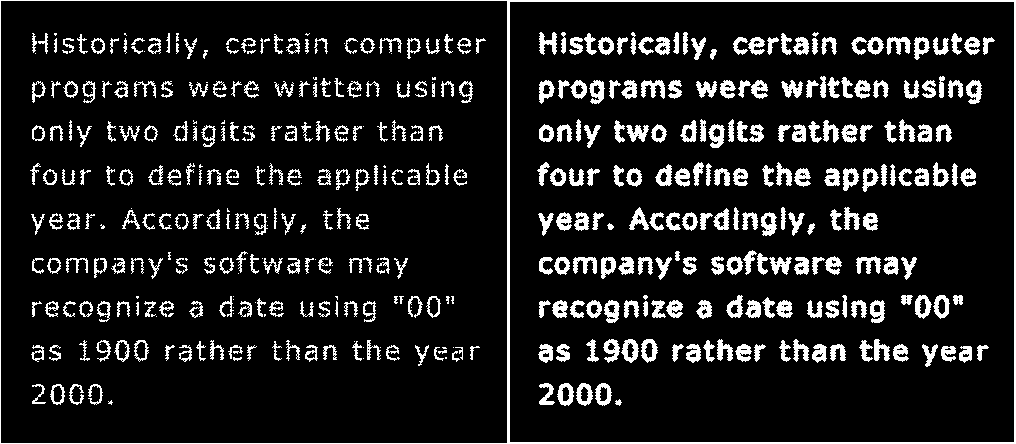

In [31]:
img = cv2.imread('images/Broken_Text.tif', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
img_dilated  = cv2.dilate(img, kernel)

display_np_row([img, img_dilated])

## Ejercicio 2

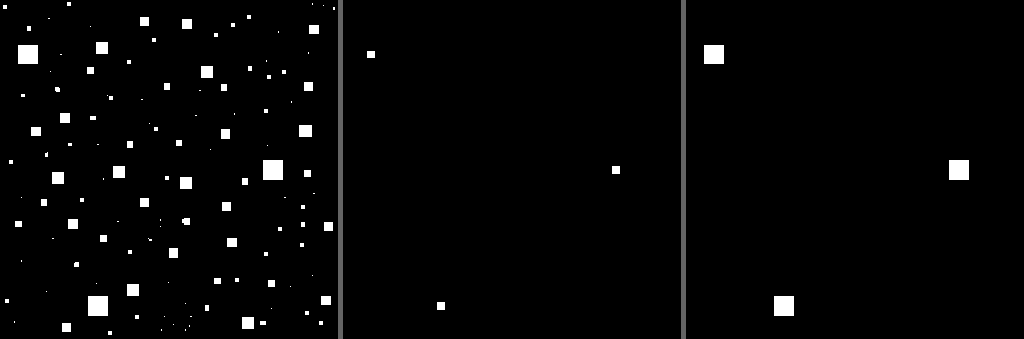

In [35]:
img = cv2.imread('images/Noisy_Squares.tif', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((13, 13), dtype=np.uint8)
img_eroded  = cv2.erode(img, kernel)
img_dilated  = cv2.dilate(img_eroded, kernel)

display_np_row([img, img_eroded, img_dilated], spacer_width=5, spacer_grayscale=100)

## Ejercicio 3

Kernel de apertura:


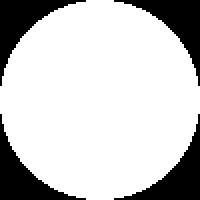

Resultado de apertura:


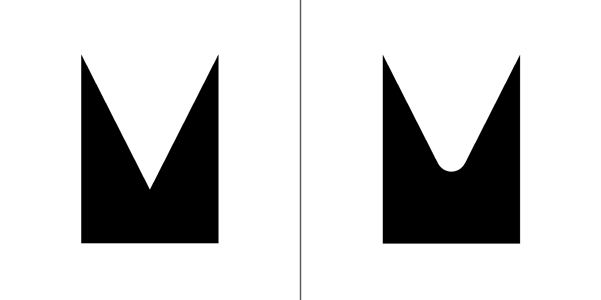

Resultado de apertura al invertir la imagen:


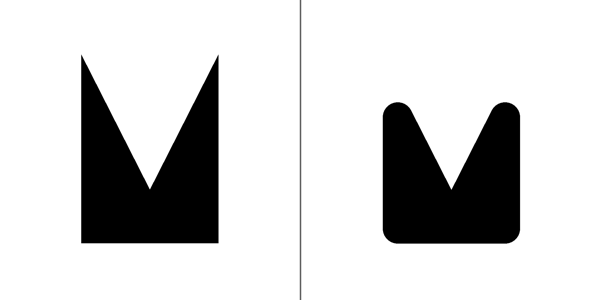

In [75]:
img = cv2.imread('images/ex3.png', cv2.IMREAD_GRAYSCALE)

KERNEL_RADIUS = 50

inside_circle = lambda x, y: (x+0.5-KERNEL_RADIUS)**2+(y+0.5-KERNEL_RADIUS)**2 < (KERNEL_RADIUS)**2
kernel = [[1 if inside_circle(x, y) else 0 for x in range(KERNEL_RADIUS*2)] for y in range(KERNEL_RADIUS*2)]

kernel = np.array(kernel, dtype=np.uint8)
print('Kernel de apertura:')
display_np(kernel*255, scale=100/KERNEL_RADIUS, resampling=Image.Resampling.NEAREST)

img_eroded  = cv2.erode(img, kernel)
img_dilated  = cv2.dilate(img_eroded, kernel)

print('Resultado de apertura:')
display_np_row([img, img_dilated], scale=0.3, spacer_width=5, spacer_grayscale=100)

img_eroded  = cv2.erode(cv2.bitwise_not(img), kernel)
img_dilated  = cv2.bitwise_not(cv2.dilate(img_eroded, kernel))

print('Resultado de apertura al invertir la imagen:')
display_np_row([img, img_dilated], scale=0.3, spacer_width=5, spacer_grayscale=100)

## Ejercicio 4

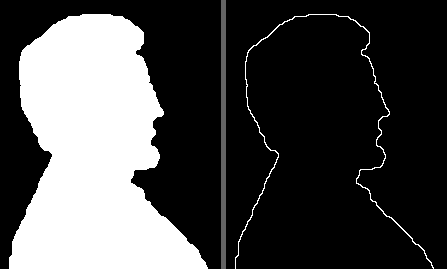

In [83]:
img = cv2.imread('images/Lincoln from penny.tif', cv2.IMREAD_GRAYSCALE)

kernel = np.ones((3, 3), dtype=np.uint8)
img_eroded  = cv2.erode(img, kernel)
img_contour = img-img_eroded

display_np_row([img, img_contour], spacer_width=5, spacer_grayscale=100)

## Ejercicio 5

https://docs.opencv.org/4.x/db/d06/tutorial_hitOrMiss.html

https://homepages.inf.ed.ac.uk/rbf/HIPR2/thin.htm

In [2]:
import cv2
import numpy as np

Thinning

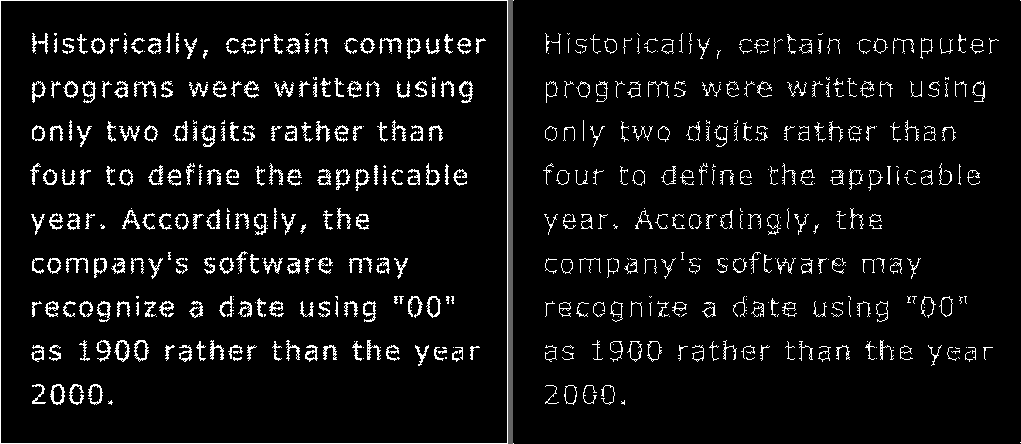

With Opencv directly:


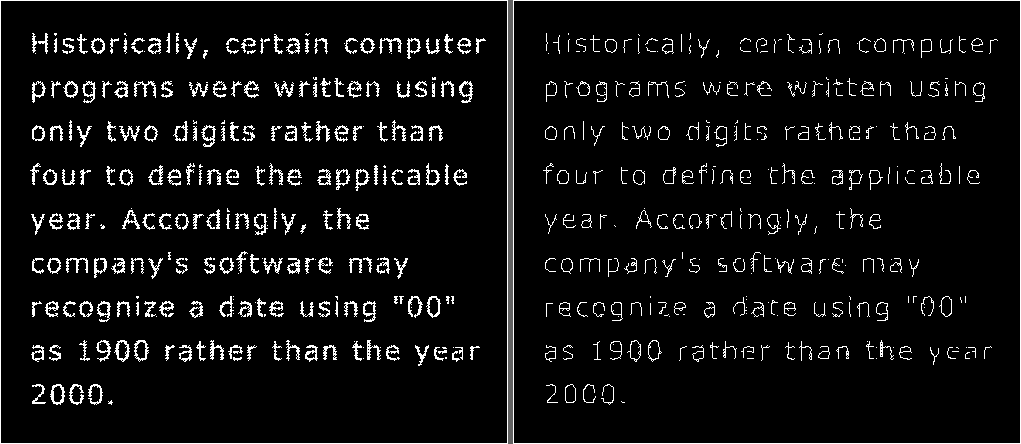

In [46]:
def thinning(A, B):
    for Bi in B:
        A = A - cv2.morphologyEx(src=A, op=cv2.MORPH_HITMISS, kernel=Bi)
    return A

img = cv2.imread('images/Broken_Text.tif', cv2.IMREAD_GRAYSCALE)

B1 = np.array(
    object=[[-1, -1, -1],
            [0, 1, 0],
            [1, 1, 1]],
    dtype="int"
)
B2 = cv2.rotate(B1, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B3 = cv2.rotate(B2, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B4 = cv2.rotate(B3, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B5 = np.array(
    object=[[0, -1, -1],
            [1, 1, -1],
            [0, 1, 0]],
    dtype="int"
)
B6 = cv2.rotate(B5, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B7 = cv2.rotate(B6, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B8 = cv2.rotate(B7, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B = B1, B2, B3, B4, B5, B6, B7, B8

out_img = thinning(A=img, B=B)
display_np_row([img, out_img], scale=1, spacer_width=5, spacer_grayscale=100)

print("With Opencv directly:")
dst = cv2.ximgproc.thinning(src=img)
display_np_row([img, dst], scale=1, spacer_width=5, spacer_grayscale=100)

Thickening

In [42]:
def thickening(A, B):
    Ac = 255 - A
    for Bi in B:
        Ac = Ac - cv2.morphologyEx(src=Ac, op=cv2.MORPH_HITMISS, kernel=Bi)
    return 255 - Ac

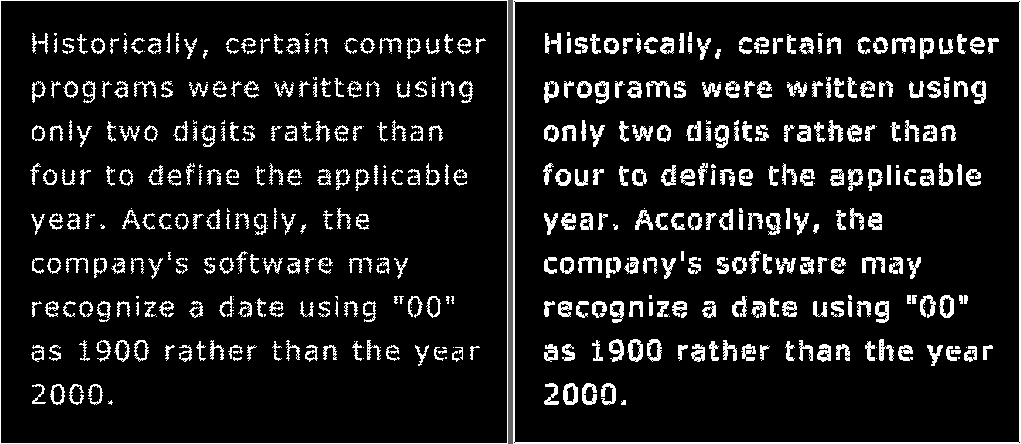

In [43]:
img = cv2.imread('images/Broken_Text.tif', cv2.IMREAD_GRAYSCALE)


B1 = np.array(
    object=[[-1, -1, -1],
            [0, 1, 0],
            [1, 1, 1]],
    dtype="int"
)
B2 = cv2.rotate(B1, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B3 = cv2.rotate(B2, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B4 = cv2.rotate(B3, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B5 = np.array(
    object=[[0, -1, -1],
            [1, 1, -1],
            [0, 1, 0]],
    dtype="int"
)
B6 = cv2.rotate(B5, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B7 = cv2.rotate(B6, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B8 = cv2.rotate(B7, rotateCode=cv2.ROTATE_90_CLOCKWISE)
B = B1, B2, B3, B4, B5, B6, B7, B8


out_img = thickening(A=img, B=B)

display_np_row([img, out_img], scale=1, spacer_width=5, spacer_grayscale=100)

Top-hat

El resultado final con el threshold es más claro usando previamente top-hat ya que se eliminan las sombras.

Before and after Top-hat


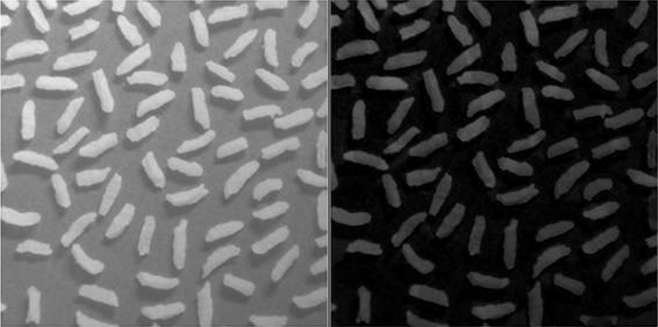

Best possible threshold for the previous images


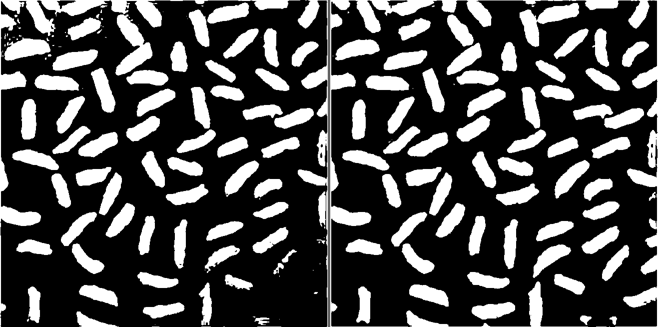

In [126]:
img = cv2.imread("images/Tophat.png", cv2.IMREAD_GRAYSCALE)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (40, 40))
out_img = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

res, img_th = cv2.threshold(img, 152, 255, cv2.THRESH_BINARY)
res, out_img_th = cv2.threshold(out_img, 30, 255, cv2.THRESH_BINARY)

print("Before and after Top-hat")
display_np_row([img, out_img], scale=0.5, spacer_width=5, spacer_grayscale=100)
print("Best possible threshold for the previous images")
display_np_row([img_th, out_img_th], scale=0.5, spacer_width=5, spacer_grayscale=100)

Hit-and-miss

Podemos usarlo, por ejemplo, para obtener los bordes de una imagen.

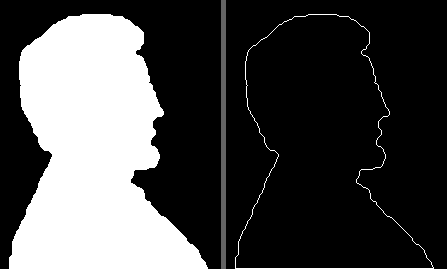

Left borders


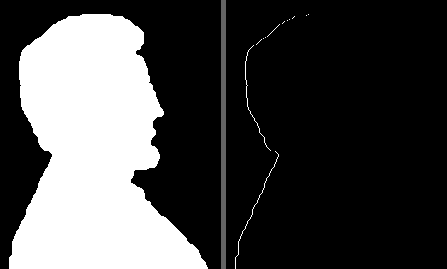

Right borders


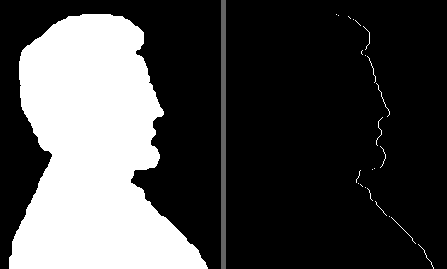

Top borders


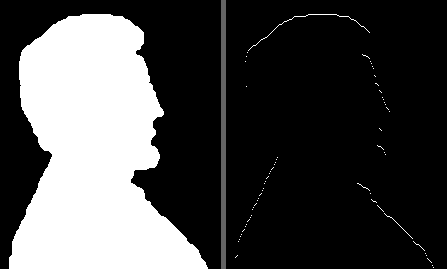

Bottom borders


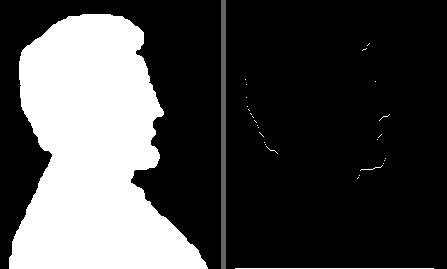

In [125]:
img = cv2.imread('images/Lincoln from penny.tif', cv2.IMREAD_GRAYSCALE)

left = np.array(
    object=[[0, 0, 0], 
            [-1, 1, 0],
            [0, 0, 0]], dtype="int")
right = np.array(
    object=[[0, 0, 0],
            [0, 1, -1],
            [0, 0, 0]], dtype="int")
top = np.array(
    object=[[0, -1, 0],
            [0, 1, 0],
            [0, 0, 0]], dtype="int")
bottom = np.array(
    object=[[0, 0, 0],
            [0, 1, 0],
            [0, -1, 0]], dtype="int")

A1 = cv2.morphologyEx(src=img, op=cv2.MORPH_HITMISS, kernel=left)
A2 = cv2.morphologyEx(src=img, op=cv2.MORPH_HITMISS, kernel=right)
A3 = cv2.morphologyEx(src=img, op=cv2.MORPH_HITMISS, kernel=top)
A4 = cv2.morphologyEx(src=img, op=cv2.MORPH_HITMISS, kernel=bottom)

borders = A1 | A2 | A3 | A4
display_np_row([img, borders], spacer_width=5, spacer_grayscale=100)

print("Left borders")
display_np_row([img, A1], spacer_width=5, spacer_grayscale=100)
print("Right borders")
display_np_row([img, A2], spacer_width=5, spacer_grayscale=100)
print("Top borders")
display_np_row([img, A3], spacer_width=5, spacer_grayscale=100)
print("Bottom borders")
display_np_row([img, A4], spacer_width=5, spacer_grayscale=100)